# Benin EDA Notebook Template
# File: notebooks/benin_eda.ipynb

# Step 0: Import libraries

In [1]:
import sys
sys.executable
print(f"Python executable path: {sys.executable}")

Python executable path: c:\Users\ADMIN\Desktop\KALEB\10Academy\Week0\solar-challenge-week0\venv\Scripts\python.exe


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Inline plotting for Jupyter

In [5]:
%matplotlib inline

# Step 1: Load CSV

In [6]:
df = pd.read_csv("../data/benin-malanville.csv")

# Step 2: Inspect the first rows

In [7]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Step 3: Summary statistics

In [8]:
print("\nSummary statistics for numeric columns:")
display(df.describe())


Summary statistics for numeric columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


# Step 4: Missing values report

In [9]:
print("\nMissing values per column:")
display(df.isna().sum())


Missing values per column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

# Step 5: Identify columns with >5% missing

In [10]:
threshold = 0.05 * len(df)
missing_over_5pct = df.columns[df.isna().sum() > threshold].tolist()
print("\nColumns with >5% missing values:", missing_over_5pct)


Columns with >5% missing values: ['Comments']


# Step 6: Outlier detection using Z-score

In [12]:
# Step 7: Basic cleaning - impute missing values
numeric_cols = df.select_dtypes(include=np.number).columns  # get numeric columns
print("Numeric columns:", numeric_cols)

# Impute missing values with median
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Check if any numeric column still has missing values
print("Missing values after imputation:\n", df[numeric_cols].isna().sum())


Numeric columns: Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')
Missing values after imputation:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


c:\Users\ADMIN\Desktop\KALEB\10Academy\Week0\solar-challenge-week0\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


# Step 7: Basic cleaning
# Impute missing values in numeric columns with median

In [13]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


# Step 8: Save cleaned data (do NOT commit data/)

In [14]:
df.to_csv("../data/benin_clean.csv", index=False)
print("\nCleaned data saved to data/benin_clean.csv")


Cleaned data saved to data/benin_clean.csv


# Step 9: Time series plots

c:\Users\ADMIN\Desktop\KALEB\10Academy\Week0\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


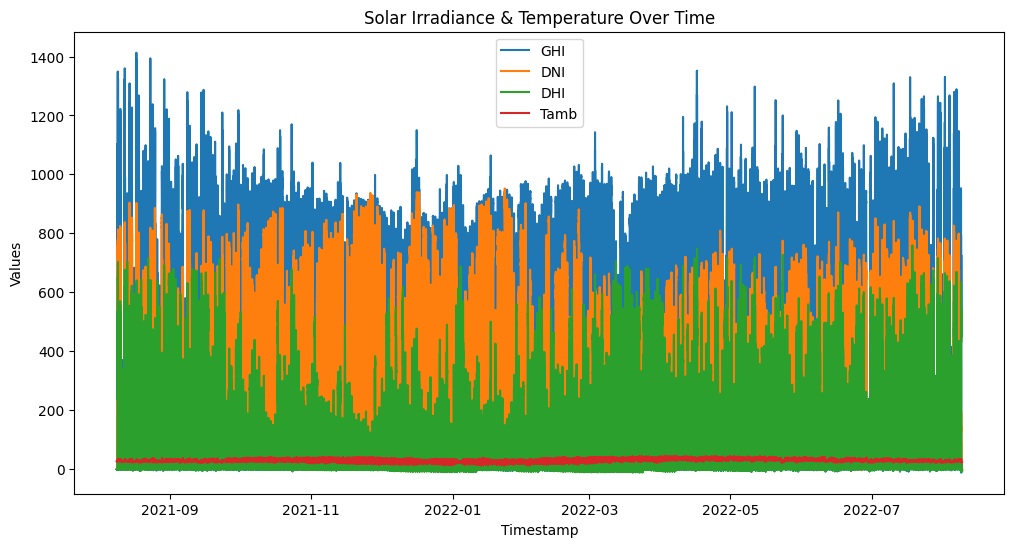

In [18]:
plt.figure(figsize=(12, 6))
for col in ["GHI", "DNI", "DHI", "Tamb"]:
    plt.plot(pd.to_datetime(df["Timestamp"]), df[col], label=col)
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Solar Irradiance & Temperature Over Time")
plt.legend()
plt.show()

# Step 10: Correlation heatmap

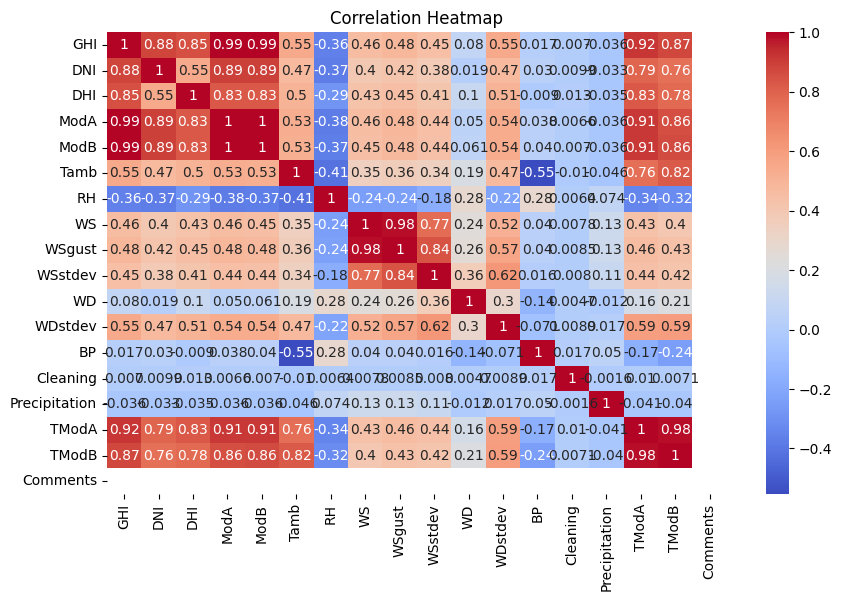

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 11: Scatter plots

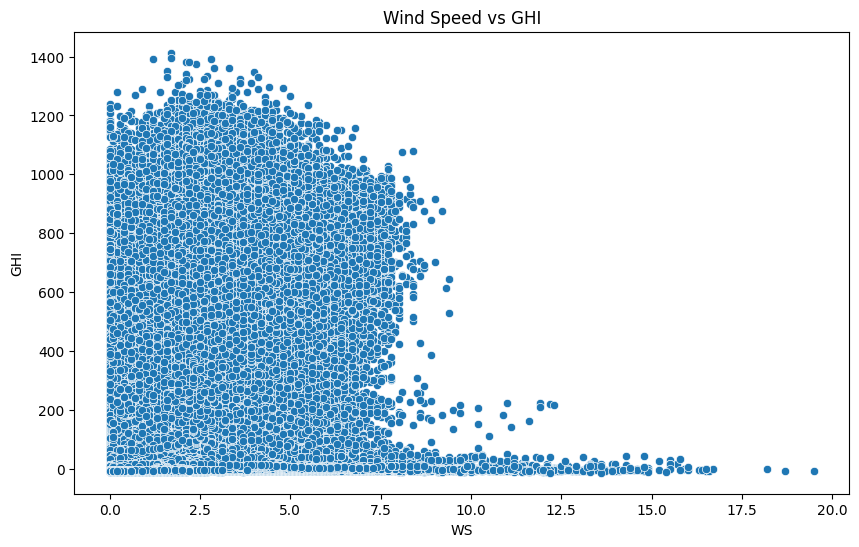

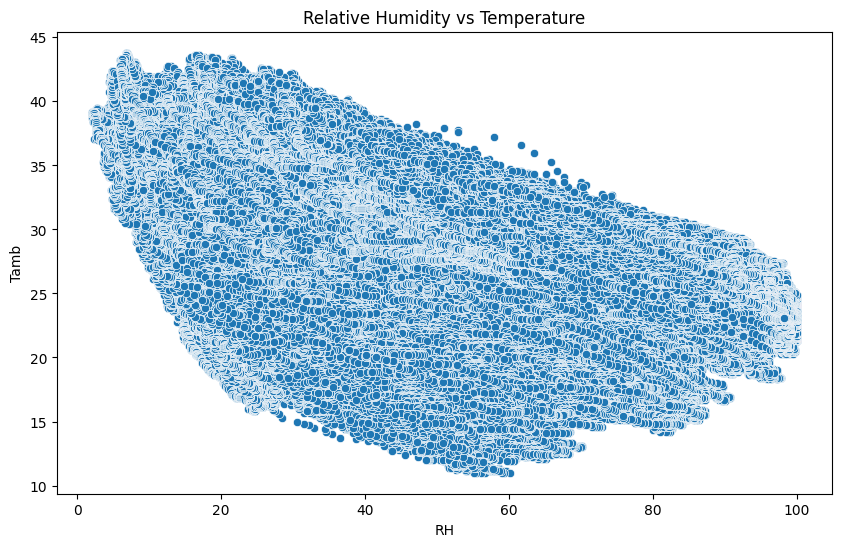

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="WS", y="GHI", data=df)
plt.title("Wind Speed vs GHI")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="RH", y="Tamb", data=df)
plt.title("Relative Humidity vs Temperature")
plt.show()

# Step 12: Histograms

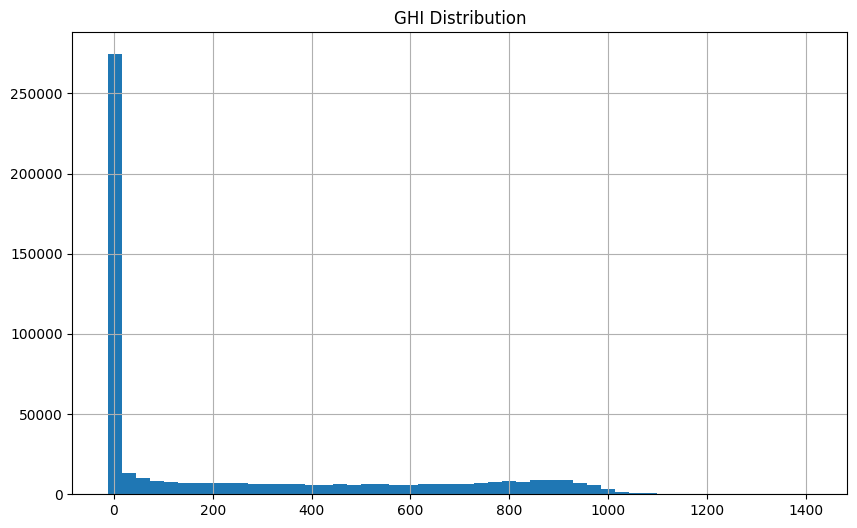

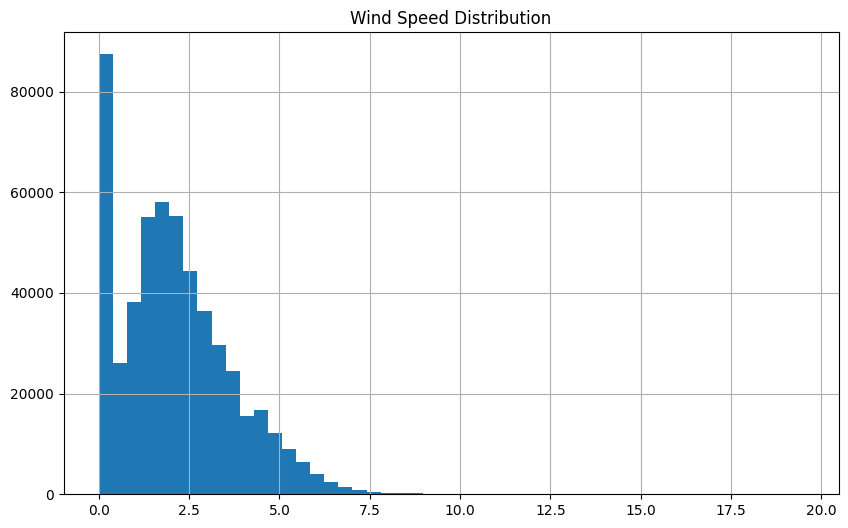

In [19]:
plt.figure(figsize=(10, 6))
df["GHI"].hist(bins=50)
plt.title("GHI Distribution")
plt.show()

plt.figure(figsize=(10, 6))
df["WS"].hist(bins=50)
plt.title("Wind Speed Distribution")
plt.show()

# Step 13: Bubble chart (GHI vs Tamb, bubble = RH)

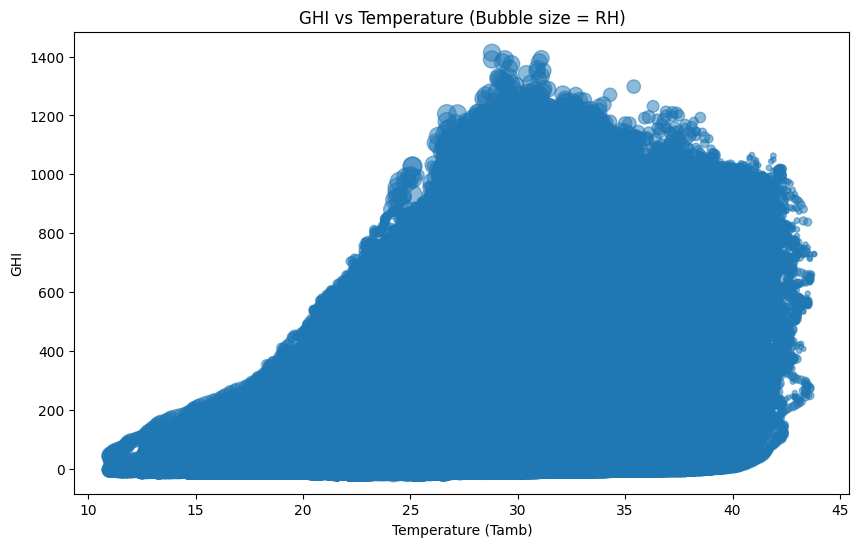

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Tamb"], df["GHI"], s=df["RH"]*2, alpha=0.5)
plt.xlabel("Temperature (Tamb)")
plt.ylabel("GHI")
plt.title("GHI vs Temperature (Bubble size = RH)")
plt.show()